In [3]:
import warnings
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import itertools
init_notebook_mode(connected=True)
sys.path.append("C:/dev/pycmqlib3/")
sys.path.append("C:/dev/pycmqlib3/misc_scripts/")
warnings.filterwarnings('ignore')
import misc
import data_handler as dh
import plotly_examples
import backtest
%matplotlib inline

In [4]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP', 'sp', 'CJ', 'UR']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2008,10,1), 'm': datetime.date(2010,10,1),
    'y': datetime.date(2010,1,1), 'l': datetime.date(2008,1,1), 'rb':datetime.date(2010,1,1),
    'p': datetime.date(2010,1,1), 'cu':datetime.date(2010,1,1), 'al':datetime.date(2010,1,1),
    'zn':datetime.date(2010,1,1), 'au':datetime.date(2010,1,1), 'v': datetime.date(2010,1,1),
    'a': datetime.date(2010,1,1), 'ru':datetime.date(2010,1,1), 'ag':datetime.date(2012,7,6),
    'i': datetime.date(2013,12,13), 'j': datetime.date(2011,6,14), 'jm':datetime.date(2013,5,24),
    'CF':datetime.date(2008,1,1),  'TA':datetime.date(2007,2,15),
    'PM':datetime.date(2012,10,1), 'RM':datetime.date(2013,3,16),  'SR':datetime.date(2006,1,6),
    'FG':datetime.date(2013,2,1),  'OI':datetime.date(2013,6,1),  'RI':datetime.date(2013,6,1),
    'WH':datetime.date(2014,2,1),  'pp':datetime.date(2014,4,28),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2011,12,23),  'TF':datetime.date(2014,4,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,17),
    'jd':datetime.date(2014,1,6),  'ni':datetime.date(2015,5,26),  'sn':datetime.date(2015,6,8),
    'ZC':datetime.date(2013,12,28), 'hc':datetime.date(2014, 5, 21), 'SM': datetime.date(2016,11,21),
    'SF': datetime.date(2017,5,17), 'CY': datetime.date(2017, 7, 17), 'AP': datetime.date(2018, 2, 26),
    'TS': datetime.date(2018, 8, 17), 'fu': datetime.date(2018, 7, 16), 'sc': datetime.date(2018, 9, 25),
    'b': datetime.date(2017, 12, 26), 'pb': datetime.date(2011, 5, 24), 'bu': datetime.date(2015,11,1),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 4, 1), 'sp': datetime.date(2019, 1, 24),
    'CJ': datetime.date(2019, 8, 1), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2019, 12, 9),
    'eb': datetime.date(2019, 12, 1), 'eg': datetime.date(2019, 2, 13), 'rr': datetime.date(2019, 8, 19),
    'pg': datetime.date(2020, 10, 1), 'lu': datetime.date(2020, 8, 1),}
min_start_dict = { 'c': datetime.date(2008,10,1), 'm': datetime.date(2010,10,1),
    'y': datetime.date(2010,1,1), 'l': datetime.date(2008,1,1), 'rb':datetime.date(2010,1,1),
    'p': datetime.date(2010,1,1), 'cu':datetime.date(2010,1,1), 'al':datetime.date(2010,1,1),
    'zn':datetime.date(2010,1,1), 'au':datetime.date(2010,1,1), 'v': datetime.date(2010,1,1),
    'a': datetime.date(2010,1,1), 'ru':datetime.date(2010,1,1), 'ag':datetime.date(2012,7,6),
    'i': datetime.date(2013,12,13), 'j': datetime.date(2011,6,14), 'jm':datetime.date(2013,5,24),
    'CF':datetime.date(2008,1,1),  'TA':datetime.date(2007,2,15),
    'PM':datetime.date(2012,10,1), 'RM':datetime.date(2013,3,16),  'SR':datetime.date(2006,1,6),
    'FG':datetime.date(2013,2,1),  'OI':datetime.date(2013,6,1),  'RI':datetime.date(2013,6,1),
    'WH':datetime.date(2014,2,1),  'pp':datetime.date(2014,4,28),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2011,12,23),  'TF':datetime.date(2014,4,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,17),
    'jd':datetime.date(2014,1,6),  'ni':datetime.date(2015,5,26),  'sn':datetime.date(2015,6,8),
    'ZC':datetime.date(2013,12,28), 'hc':datetime.date(2014, 5, 21), 'SM': datetime.date(2016,11,21),
    'SF': datetime.date(2017,5,17), 'CY': datetime.date(2017, 7, 17), 'AP': datetime.date(2018, 2, 26),
    'TS': datetime.date(2018, 8, 17), 'fu': datetime.date(2018, 7, 16), 'sc': datetime.date(2018, 9, 25),
    'b': datetime.date(2017, 12, 26), 'pb': datetime.date(2011, 5, 24), 'bu': datetime.date(2015,11,1),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 4, 1), 'sp': datetime.date(2019, 1, 24),
    'CJ': datetime.date(2019, 8, 1), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2019, 12, 9),
    'eb': datetime.date(2019, 12, 1), 'eg': datetime.date(2019, 2, 13), 'rr': datetime.date(2019, 8, 19),
    'pg': datetime.date(2020, 10, 1), 'lu': datetime.date(2020, 8, 1),}

In [5]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']

start_date = datetime.date(2010,1,1)
end_date = datetime.date(2021,2,10)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '8y', '10y']

sim_products = ferrous_products_mkts
need_shift = 1
freq = 'm'
delim = '-'

dbtbl_prefix = ''
args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'n': 1, 'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'n': 1, 'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'n': 1, 'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []
for idx, asset in enumerate(sim_products):
    use_args = args
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['sc']:
        use_args = sc_args    
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict[asset], start_date)
    use_args['end_date'] = end_date
    print("loading mkt = %s, args = %s" % (asset, use_args))
    df = misc.nearby(asset, **use_args)
    if freq == 'm':
        df = misc.cleanup_mindata(df, asset)
    if (idx == 0) and (freq == 'm'):
        df_list.append(df[['date', 'min_id']])
    xdf = df[field_list]
    xdf.columns = [delim.join((asset, col)) for col in xdf.columns]
    df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False)

loading mkt = rb, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'm', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2010, 1, 1), 'end_date': datetime.date(2021, 2, 10)}
continuous contract stopped at rb1005 for start = 2010-01-01, expiry= 2010-04-05
loading mkt = hc, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'm', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 5, 21), 'end_date': datetime.date(2021, 2, 10)}
loading mkt = i, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'm', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2013, 12, 13), 'end_date': datetime.date(2021, 2, 10)}
loading mkt = j, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'm', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 6, 14), 'end_date': datetime.date(2021, 2, 10)}
loading mkt = jm, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'm', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2013, 5, 24), 'end_date': datetime.date(

In [6]:
print(df.tail(20))

                           date  min_id  rb-open  rb-high  rb-low  rb-close  \
datetime                                                                      
2021-02-10 22:40:00  2021-02-10   440.0   4383.0   4384.0  4381.0    4384.0   
2021-02-10 22:41:00  2021-02-10   441.0   4384.0   4387.0  4383.0    4386.0   
2021-02-10 22:42:00  2021-02-10   442.0   4386.0   4389.0  4385.0    4389.0   
2021-02-10 22:43:00  2021-02-10   443.0   4388.0   4390.0  4387.0    4389.0   
2021-02-10 22:44:00  2021-02-10   444.0   4390.0   4390.0  4387.0    4388.0   
2021-02-10 22:45:00  2021-02-10   445.0   4388.0   4392.0  4387.0    4392.0   
2021-02-10 22:46:00  2021-02-10   446.0   4392.0   4392.0  4389.0    4390.0   
2021-02-10 22:47:00  2021-02-10   447.0   4390.0   4390.0  4388.0    4389.0   
2021-02-10 22:48:00  2021-02-10   448.0   4388.0   4391.0  4388.0    4388.0   
2021-02-10 22:49:00  2021-02-10   449.0   4388.0   4389.0  4386.0    4386.0   
2021-02-10 22:50:00  2021-02-10   450.0   4386.0   4

In [4]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.2])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    select_cols = []
    for col in df.columns:
        col_split = col.split(delim)
        if col_split[0] in product_list:
            select_cols.append(col)
    xdf= df[select_cols].sort_index().fillna(method='ffill').copy()
    if start_date:
        xdf = xdf[xdf.index>= start_date]
    if end_date:
        xdf = xdf[xdf.index<= end_date]
    for asset in product_list:
        if need_shift == 1:
            xdf[delim.join((asset, 'lr'))] = np.log(xdf[delim.join((asset, 'close'))] \
                                                        -xdf[delim.join((asset, 'shift'))]) \
                                            - np.log(xdf[delim.join((asset, 'close'))].shift(1) \
                                                        -xdf[delim.join((asset, 'shift'))])
        else:
            xdf[delim.join((asset, 'lr'))] = \
                np.log(xdf[delim.join((asset, 'close'))])- np.log(xdf[delim.join((asset, 'close'))].shift(1))
        xdf[delim.join((asset, 'mom'))] = xdf[delim.join((asset, 'lr'))].rolling(mom_win).sum()
        if run_mode == 'momma':
            xdf[delim.join((asset, 'momma'))] = xdf[delim.join((asset, 'mom'))].rolling(ma_win).mean()
        elif run_mode == 'mixedmom':       
            xdf[delim.join((asset, 'tmpos'))] = xdf[delim.join((asset, 'lr'))].rolling(mom_win).agg(lambda x: (x>0).sum()/mom_win)
            xdf[delim.join((asset, 'tmneg'))] = xdf[delim.join((asset, 'lr'))].rolling(mom_win).agg(lambda x: (x<0).sum()/mom_win)        
        elif run_mode == 'rsi':
            rsi_output = dh.RSI_F(xdf, mom_win, prefix = asset + delim)
            xdf[delim.join((asset, 'rsi'))] = rsi_output[asset + delim + 'RSI' + str(mom_win)]
        elif run_mode == 'rsima':
            rsi_output = dh.RSI_F(xdf, mom_win, prefix = asset + delim)
            xdf[delim.join((asset, 'rsi'))] = rsi_output[asset + delim + 'RSI' + str(mom_win)]
            xdf[delim.join((asset, 'rsima'))] = dh.EMA(xdf, ma_win, field = 'rsi', prefix = asset + delim)
        elif run_mode == 'madist':
            xdf[delim.join((asset, 'ema1'))] = dh.EMA(xdf, mom_win, field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'ema2'))] = dh.EMA(xdf, int(mom_win * params[0]), field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'std'))] = dh.STDEV(xdf, ma_win, field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'madist'))] = (xdf[delim.join((asset, 'ema1'))] - xdf[delim.join((asset, 'ema2'))])/xdf[delim.join((asset, 'std'))]
            xdf[delim.join((asset, 'nmadist'))] = xdf[delim.join((asset, 'madist'))]/dh.STDEV(xdf, int(ma_win * params[1]), field = 'madist', prefix = asset + delim)
            xdf[delim.join((asset, 'sig'))] = xdf[delim.join((asset, 'nmadist'))].apply(lambda x: dh.response_curve(x, "reverting", param = 2.0))
        if need_shift == 1:        
            orig_close = xdf[delim.join((asset, 'close'))] -xdf[delim.join((asset, 'shift'))]
            if pos_std == 1:
                xdf[delim.join((asset, 'std'))] = dh.ATR(df, vol_win, prefix = asset + delim).fillna(method='bfill') * 10.0
            else:
                xdf[delim.join((asset, 'std'))] = orig_close
        elif need_shift == 2:
            orig_close = xdf[delim.join((asset, 'close'))] * np.exp(-xdf[delim.join((asset, 'shift'))])
            if pos_std == 1:
                xdf[delim.join((asset, 'std'))] = (np.log(xdf[delim.join((asset, 'close'))]) \
                                - np.log(xdf[delim.join((asset, 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close * 10
            else:
                xdf[delim.join((asset, 'std'))] = orig_close
        else:
            orig_close = xdf[delim.join((asset, 'close'))]
            xdf[delim.join((asset, 'std'))] = orig_close
        
    total_risk = 5000000.0
    margin_rate = [0.08, 0.08]
    
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    mom_df = xdf[[delim.join((asset, 'mom')) for asset in product_list]]
    mom_df.columns = product_list
    
    xdf['prod_count'] = mom_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    xdf['rebal_seqno'] = range(len(xdf.index))

    long_pos = pd.DataFrame(0, columns = product_list, index = xdf.index)
    short_pos = pd.DataFrame(0, columns = product_list, index = xdf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=product_list, index = xdf.index)
        short_tmp = pd.DataFrame(columns=product_list, index = xdf.index)
        rebal_flag = xdf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in product_list:
            if run_mode == 'momma':
                long_tmp.loc[(xdf[delim.join((asset, 'mom'))] > xdf[delim.join((asset, 'momma'))]) & rebal_flag, asset] = 1.0
                long_tmp.loc[(xdf[delim.join((asset, 'mom'))] < xdf[delim.join((asset, 'momma'))]) & rebal_flag, asset] = 0.0
                short_tmp.loc[(xdf[delim.join((asset, 'mom'))] < xdf[delim.join((asset, 'momma'))]) & rebal_flag, asset] = 1.0
                short_tmp.loc[(xdf[delim.join((asset, 'mom'))] > xdf[delim.join((asset, 'momma'))]) & rebal_flag, asset] = 0.0            
            elif run_mode == 'mixedmom':
                long_tmp.loc[(xdf[delim.join((asset, 'mom'))] > 0.0) & (xdf[delim.join((asset, 'tmpos'))] > 0.5) & rebal_flag, asset] = 1.0
                long_tmp.loc[((xdf[delim.join((asset, 'mom'))] <= 0.0) | (xdf[delim.join((asset, 'tmpos'))] <= 0.5)) & rebal_flag, asset] = 0.0            
                short_tmp.loc[(xdf[delim.join((asset, 'mom'))] < 0.0) & (xdf[delim.join((asset, 'tmneg'))] > 0.5) & rebal_flag, asset] = 1.0
                short_tmp.loc[((xdf[delim.join((asset, 'mom'))] >= 0.0) | (xdf[delim.join((asset, 'tmneg'))]<= 0.5)) & rebal_flag, asset] = 0.0
            elif run_mode == 'rsi':
                long_tmp.loc[(xdf[delim.join((asset, 'rsi'))] > 50 + params[0] * 100) & rebal_flag, asset] = 1.0
                long_tmp.loc[(xdf[delim.join((asset, 'rsi'))] <= 50 - params[0] * 100)  & rebal_flag, asset] = 0.0            
                short_tmp.loc[(xdf[delim.join((asset, 'rsi'))] < 50.0 - params[0] * 100) & rebal_flag, asset] = 1.0
                short_tmp.loc[(xdf[delim.join((asset, 'rsi'))] >= 50.0 + params[0] * 100) & rebal_flag, asset] = 0.0
            elif run_mode == 'rsima':
                long_tmp.loc[(xdf[delim.join((asset, 'rsi'))] > xdf[delim.join((asset, 'rsima'))]) & rebal_flag, asset] = 1.0
                long_tmp.loc[(xdf[delim.join((asset, 'rsi'))] <= xdf[delim.join((asset, 'rsima'))])  & rebal_flag, asset] = 0.0            
                short_tmp.loc[(xdf[delim.join((asset, 'rsi'))] < xdf[delim.join((asset, 'rsima'))]) & rebal_flag, asset] = 1.0
                short_tmp.loc[(xdf[delim.join((asset, 'rsi'))] >= xdf[delim.join((asset, 'rsima'))]) & rebal_flag, asset] = 0.0
            elif run_mode == 'madist':
                long_tmp.loc[(xdf[delim.join((asset, 'sig'))] > 0.0) & rebal_flag, asset] = xdf[delim.join((asset, 'sig'))]
                long_tmp.loc[(xdf[delim.join((asset, 'sig'))] <= 0.0)  & rebal_flag, asset] = 0.0
                short_tmp.loc[(xdf[delim.join((asset, 'sig'))] < 0.0) & rebal_flag, asset] = -xdf[delim.join((asset, 'sig'))]
                short_tmp.loc[(xdf[delim.join((asset, 'sig'))] >= 0.0) & rebal_flag, asset] = 0.0

        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp
        short_pos = short_pos + short_tmp
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []

    for asset, offset in zip(product_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk \
                    /(xdf['prod_count'] * rebal_freq * xdf[delim.join((asset,'std'))].astype('float'))).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk \
                    /(xdf['prod_count'] * rebal_freq * xdf[delim.join((asset,'std'))].astype('float'))).shift(1).fillna(method='ffill')
        xdf[delim.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        xdf[delim.join((asset, 'traded_price'))] = xdf[delim.join((asset, 'open'))]
        xdf[delim.join((asset, 'pos'))].iloc[-1] = 0
        xdf[delim.join((asset, 'cost'))] = \
                abs(xdf[delim.join((asset, 'pos'))] \
                - xdf[delim.join((asset, 'pos'))].shift(1)) * offset
        xdf[delim.join((asset, 'cost'))] = xdf[delim.join((asset, 'cost'))].fillna(0.0)
        fields = [delim.join((asset, field)) for field in extract_fields] 
        tdf = xdf[fields]
        tdf.columns = extract_fields
        tdf.index.name = 'date'    
        if freq == 'm':
            tdf['date'] = xdf['date']
            tdf['min_id'] = xdf['min_id']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = 1.0)
        
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = 1.0)
    pos_df  = xdf[[delim.join((asset, 'pos')) for asset in product_list]]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df}
    return res

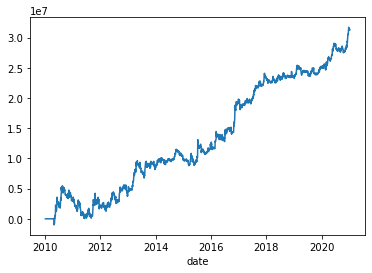

                 momma-mixed_metal_mkts-20-50-5
sharp_ratio_10y                        0.963907
sharp_ratio_1y                         2.498362
sharp_ratio_2y                         1.741222
sharp_ratio_3y                         1.240230
sharp_ratio_4y                         1.259269
sharp_ratio_5y                         1.426221
sharp_ratio_6y                         1.326177
sharp_ratio_8y                         1.199065
std_pnl_10y                       190070.331486
std_pnl_1y                        162790.492241
std_pnl_2y                        146631.079792
std_pnl_3y                        143689.987361
std_pnl_4y                        150256.421284
std_pnl_5y                        170286.477856
std_pnl_6y                        176732.742525
std_pnl_8y                        177202.290723


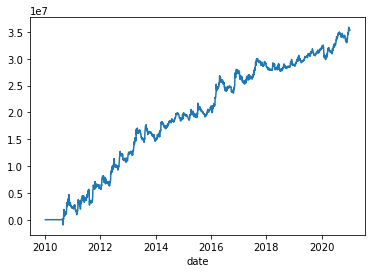

                 momma-mixed_metal_mkts-30-120-5
sharp_ratio_10y                         1.043928
sharp_ratio_1y                          1.005458
sharp_ratio_2y                          1.214144
sharp_ratio_3y                          0.907035
sharp_ratio_4y                          0.719531
sharp_ratio_5y                          0.963790
sharp_ratio_6y                          0.880783
sharp_ratio_8y                          0.971760
std_pnl_10y                        206364.650538
std_pnl_1y                         219318.961538
std_pnl_2y                         175968.913344
std_pnl_3y                         165089.033248
std_pnl_4y                         173105.597097
std_pnl_5y                         190783.269101
std_pnl_6y                         190252.189294
std_pnl_8y                         192543.703708


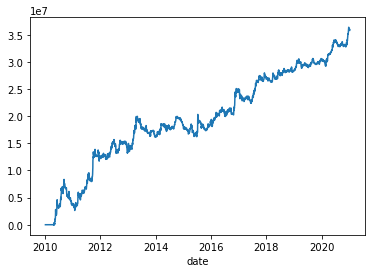

                 momma-mixed_metal_mkts-40-30-5
sharp_ratio_10y                        1.037578
sharp_ratio_1y                         2.310223
sharp_ratio_2y                         1.707072
sharp_ratio_3y                         1.367620
sharp_ratio_4y                         1.156488
sharp_ratio_5y                         1.248669
sharp_ratio_6y                         1.080071
sharp_ratio_8y                         0.912165
std_pnl_10y                       201768.928283
std_pnl_1y                        159940.146899
std_pnl_2y                        143374.808116
std_pnl_3y                        142552.431438
std_pnl_4y                        154886.532173
std_pnl_5y                        172573.995654
std_pnl_6y                        182590.427958
std_pnl_8y                        187696.085208


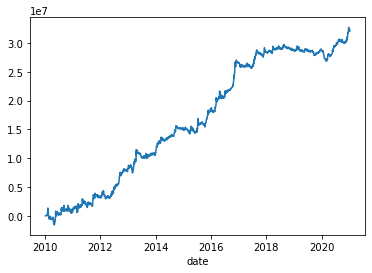

                 mixedmom-mixed_metal_mkts-10-1-10
sharp_ratio_10y                           1.505336
sharp_ratio_1y                            1.822142
sharp_ratio_2y                            1.097201
sharp_ratio_3y                            0.848495
sharp_ratio_4y                            0.882701
sharp_ratio_5y                            1.451084
sharp_ratio_6y                            1.489763
sharp_ratio_8y                            1.468461
std_pnl_10y                          134536.816269
std_pnl_1y                           126556.336988
std_pnl_2y                           104589.252802
std_pnl_3y                            99115.495075
std_pnl_4y                           104451.923440
std_pnl_5y                           120947.061095
std_pnl_6y                           126466.349708
std_pnl_8y                           130763.785573


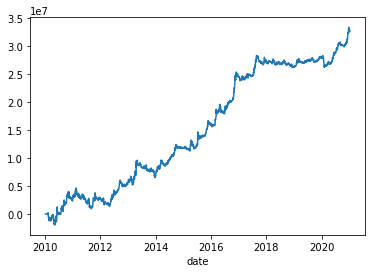

                 mixedmom-mixed_metal_mkts-20-1-10
sharp_ratio_10y                           1.213348
sharp_ratio_1y                            1.945069
sharp_ratio_2y                            1.599844
sharp_ratio_3y                            1.047987
sharp_ratio_4y                            1.062456
sharp_ratio_5y                            1.501835
sharp_ratio_6y                            1.527725
sharp_ratio_8y                            1.398900
std_pnl_10y                          159492.665518
std_pnl_1y                           163027.882304
std_pnl_2y                           130830.882201
std_pnl_3y                           120516.421094
std_pnl_4y                           126781.105118
std_pnl_5y                           144264.900483
std_pnl_6y                           149454.901035
std_pnl_8y                           155721.437203


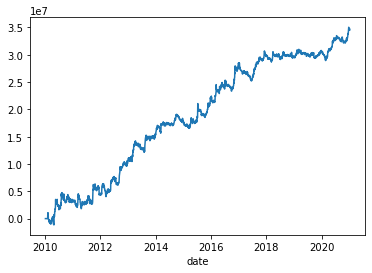

                 rsima-mixed_metal_mkts-20-30-5
sharp_ratio_10y                        1.107578
sharp_ratio_1y                         1.775929
sharp_ratio_2y                         1.201060
sharp_ratio_3y                         0.752034
sharp_ratio_4y                         0.701778
sharp_ratio_5y                         0.984886
sharp_ratio_6y                         1.096569
sharp_ratio_8y                         1.120012
std_pnl_10y                       184132.821636
std_pnl_1y                        151906.006472
std_pnl_2y                        136222.709629
std_pnl_3y                        135560.541074
std_pnl_4y                        140510.169065
std_pnl_5y                        160409.277814
std_pnl_6y                        169379.396478
std_pnl_8y                        171254.356865


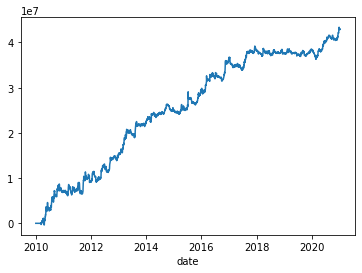

                 rsima-mixed_metal_mkts-40-30-5
sharp_ratio_10y                        1.160870
sharp_ratio_1y                         1.872192
sharp_ratio_2y                         1.206173
sharp_ratio_3y                         0.721162
sharp_ratio_4y                         0.678287
sharp_ratio_5y                         1.009406
sharp_ratio_6y                         1.078202
sharp_ratio_8y                         1.210944
std_pnl_10y                       200650.884794
std_pnl_1y                        164679.489058
std_pnl_2y                        143465.681465
std_pnl_3y                        140629.565258
std_pnl_4y                        148400.026359
std_pnl_5y                        168180.906898
std_pnl_6y                        180268.872936
std_pnl_8y                        185404.717724


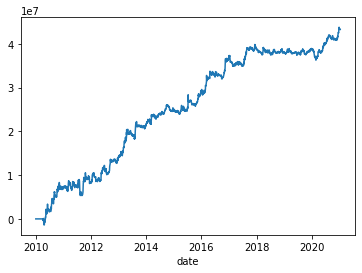

                 rsima-mixed_metal_mkts-60-30-5
sharp_ratio_10y                        1.110191
sharp_ratio_1y                         1.655839
sharp_ratio_2y                         1.122810
sharp_ratio_3y                         0.665899
sharp_ratio_4y                         0.613763
sharp_ratio_5y                         1.007939
sharp_ratio_6y                         1.066244
sharp_ratio_8y                         1.209835
std_pnl_10y                       211272.806272
std_pnl_1y                        183461.875498
std_pnl_2y                        154841.035969
std_pnl_3y                        149236.312401
std_pnl_4y                        158184.131059
std_pnl_5y                        177137.806455
std_pnl_6y                        186532.224387
std_pnl_8y                        195818.526785


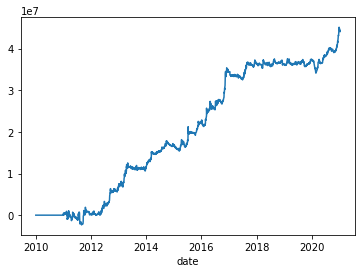

                 madist-mixed_metal_mkts-8-80-5
sharp_ratio_10y                        1.315783
sharp_ratio_1y                         2.174898
sharp_ratio_2y                         1.465636
sharp_ratio_3y                         1.008657
sharp_ratio_4y                         0.918747
sharp_ratio_5y                         1.337497
sharp_ratio_6y                         1.397363
sharp_ratio_8y                         1.432317
std_pnl_10y                       218097.267755
std_pnl_1y                        210893.958268
std_pnl_2y                        179126.125534
std_pnl_3y                        171731.029923
std_pnl_4y                        173209.764325
std_pnl_5y                        208107.400082
std_pnl_6y                        213876.974845
std_pnl_8y                        210307.393277


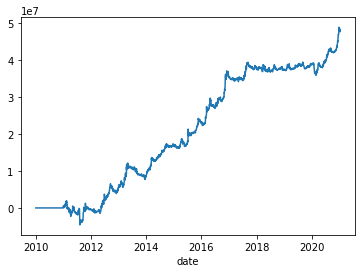

                 madist-mixed_metal_mkts-16-80-5
sharp_ratio_10y                         1.229144
sharp_ratio_1y                          2.240767
sharp_ratio_2y                          1.599563
sharp_ratio_3y                          1.143417
sharp_ratio_4y                          1.020817
sharp_ratio_5y                          1.376859
sharp_ratio_6y                          1.423930
sharp_ratio_8y                          1.425122
std_pnl_10y                        253825.722800
std_pnl_1y                         266808.950844
std_pnl_2y                         214961.996682
std_pnl_3y                         202022.368100
std_pnl_4y                         201912.320920
std_pnl_5y                         234508.243132
std_pnl_6y                         239011.277778
std_pnl_8y                         241331.417039


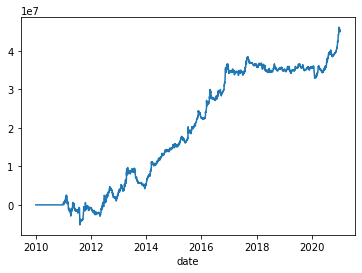

                 madist-mixed_metal_mkts-24-80-5
sharp_ratio_10y                         1.087395
sharp_ratio_1y                          2.176149
sharp_ratio_2y                          1.434978
sharp_ratio_3y                          0.969103
sharp_ratio_4y                          0.831847
sharp_ratio_5y                          1.218196
sharp_ratio_6y                          1.327066
sharp_ratio_8y                          1.331390
std_pnl_10y                        269639.315743
std_pnl_1y                         287284.647810
std_pnl_2y                         229632.675010
std_pnl_3y                         213088.970446
std_pnl_4y                         213537.808575
std_pnl_5y                         243216.813090
std_pnl_6y                         248041.955688
std_pnl_8y                         255464.491178
                 rb-pos       hc-pos        i-pos        j-pos       jm-pos  \
date                                                                          
2010-01-0

In [5]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]

metal_all_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
mixed_metal_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni', 'sn', 'SM', 'SF', 'pb']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'ni', 'sn', \
               'l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd'] 
product_list = mixed_metal_mkts # commod_mkts 
#mixed_metal_mkts # commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts  
product_name = 'mixed_metal_mkts'
run_mode = 'madist'
start_date = datetime.date(2010,1,1)
end_date = datetime.date(2021,1,5)
#save_loc = "C:\\dev\\data\\selected_ts_" + run_mode + "_" + product_name + "_" + str(end_date) + '_'
save_loc = "C:\\dev\\data\\combined_tsmom_" + product_name + "_" + str(end_date) + '_'
pos_std = 1
std_win = 20
ma_win = 120
rebal = 5
#index_list = range(8, 88, 8) # range(10, 110, 10) #range(10, 250, 10) # 
#column_list = [60, 80, 100, 120, 140, 160] #range(10, 130, 10) #[1, 3, 5, 10, 15, 20] #range(10, 90, 10) #[i * 0.01 for i in range(0, 32, 4)] #
sratio = {}
run_sratio = False
run_pos_sum = True
pos_sum = pd.DataFrame()
pos_list = []
#scenarios = list(itertools.product(index_list, column_list))
#ind_metal_mkts
scenarios = [('momma', 20, 50, 5, [0.0]), ('momma', 30, 120, 5, [0.0]), ('momma', 40, 30, 5, [0.0]), \
            ('mixedmom', 10, 1, 10, [0.0]), ('mixedmom', 20, 1, 10, [0.0]), \
            #('rsi', 10, 1, 5, [0.08]), ('rsi', 20, 1, 5, [0.0]), \
            ('rsima', 20, 30, 5, [0.0]), ('rsima', 40, 30, 5, [0.0]), ('rsima', 60, 30, 5, [0.0]), \
            ('madist', 8, 80, 5, [1.5, 2.0]), ('madist', 16, 80, 5, [1.5, 2.0]), ('madist', 24, 80, 5, [1.5, 2.0]),]
#commod_mkts
#scenarios = [('momma', 40, 30, 5, [0.0]), ('momma', 40, 80, 5, [0.0]), \
#            ('mixedmom', 10, 1, 10, [0.0]), ('mixedmom', 20, 1, 10, [0.0]), ('mixedmom', 220, 1, 10, [0.0]), \
#            ('rsima', 30, 40, 5, [0.0]), ('rsima', 30, 110, 5, [0.0]), \
#            ('madist', 8, 80, 5, [1.5, 2.0]), ('madist', 16, 80, 5, [1.5, 2.0]), ('madist', 24, 80, 5, [1.5, 2.0]),]

if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)
        
for scen in scenarios:
    if len(scen) == 2:
        scen_x = scen[0]
        scen_y = scen[1]
        if run_mode in ['mixedmom']:
            win = scen_x
            ma_win = 1
            rebal = scen_y
            params = [0.0]
        elif run_mode == 'rsi':
            win = scen_x
            rebal = 5
            ma_win = 1
            params = [scen_y * 0.01]
        elif run_mode in ['momma', 'rsima', 'madist']:
            win = scen_x
            ma_win = scen_y
            rebal = 5
            params = [1.5, 2.0]
        else:
            print("unsupported run_mode")
            continue
    elif len(scen) == 5:
        run_mode = scen[0]
        win = scen[1]
        ma_win = scen[2]
        rebal = scen[3]
        params = scen[4]
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([run_mode, product_name, str(win), str(ma_win), str(rebal)])
    run_args['cost_ratio'] = 0.5
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['run_mode'] = run_mode
    res = run_ts_test(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        pos_sum = pos_sum.add(res['pos_df'], fill_value = 0)        
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharp_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]
        
cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:
    print(pos_sum)
if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])


In [6]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    
if run_sratio and save_xl:
    xlfile = save_loc + "sratio_heatmap.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for yr in sratio_years:
        lbl = 'sharp_ratio_' + str(yr) + 'y'
        sratio[yr].to_excel(writer, lbl, startcol= 0, startrow=1)
    writer.save()    